<a href="https://colab.research.google.com/github/kundan2403/Al-algo/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

* Linear regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (predictors).

* It assumes a linear relationship between the independent variables and the dependent variable

* The goal of linear regression is to find the best-fitting line (or hyperplane in higher dimensions) that minimizes the difference between the observed values and the values predicted by the model.


```

```



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv("/content/data/EcommerceCustomers.csv")
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

<Axes: xlabel='Avg. Session Length', ylabel='Yearly Amount Spent'>

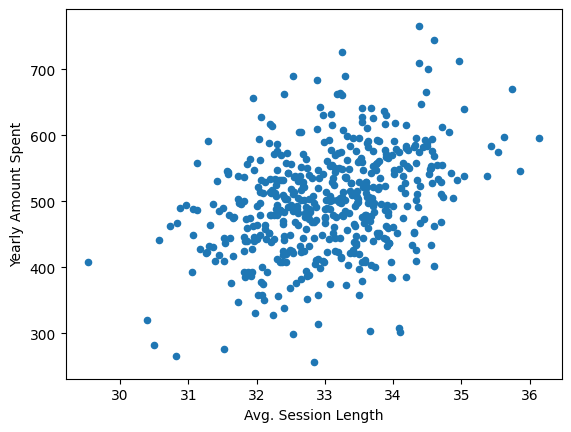

In [ ]:
data.plot(kind = 'scatter', x = "Avg. Session Length", y = "Yearly Amount Spent")

<Axes: xlabel='Time on App', ylabel='Yearly Amount Spent'>

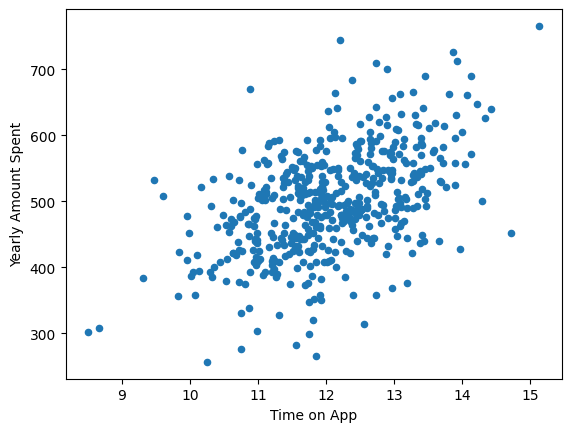

In [ ]:
data.plot(kind = 'scatter', x = "Time on App", y = "Yearly Amount Spent")

<Axes: xlabel='Time on Website', ylabel='Yearly Amount Spent'>

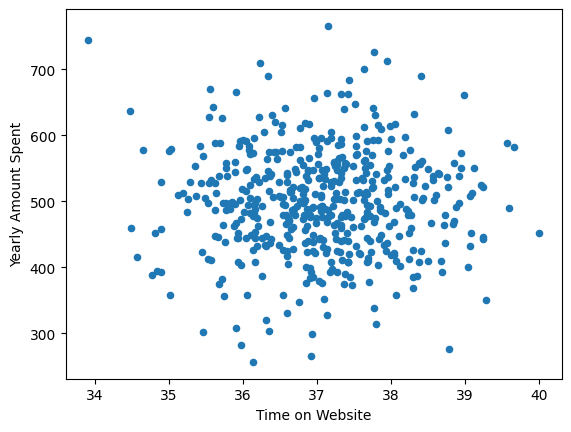

In [ ]:
data.plot(kind = 'scatter', x = "Time on Website", y = "Yearly Amount Spent")

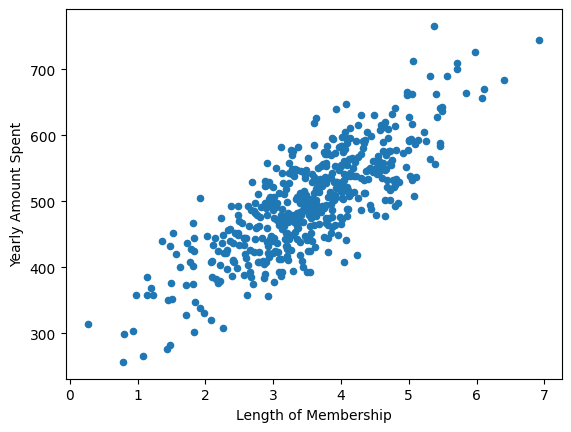

In [ ]:
data.plot(kind = 'scatter', x = "Length of Membership", y = "Yearly Amount Spent")
plt.show()

In [ ]:
data= data.drop(columns=['Email', 'Address', 'Avatar'])
data.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<Axes: >

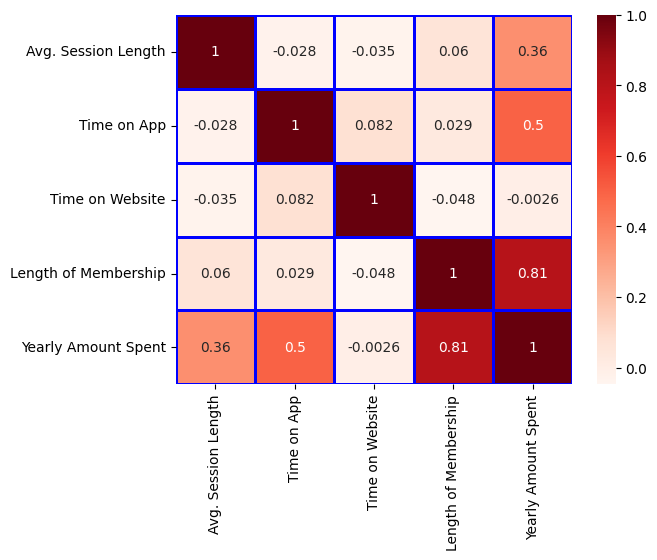

In [ ]:
import seaborn as sns

sns.heatmap(data.corr(), cmap='Reds',annot=True, linecolor='Blue', linewidths=1.0)

In [ ]:
X = data.iloc[:, : -1].values
Y = data.iloc[:, -1:].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [ ]:
intercept = model.intercept_
print("Intercept:", intercept)


# 2. Slope (coefficients)
slope = model.coef_
print("Slope:", slope)


# 3. Coefficients
coefficients = pd.DataFrame(model.coef_.reshape(-1, 1), data.columns.tolist()[ :-1], columns=['Coefficient'])
print("Coefficients:")
print(coefficients)


# 4. Determine which feature to invest more
# We can compare the coefficients to see which feature has the highest impact on Yearly Amount Spent
max_coefficient_feature = coefficients.idxmax()[0]
print("Feature to invest more:", max_coefficient_feature)

Intercept: [-1060.55080962]
Slope: [[25.88815047 38.87046474  0.47066154 61.78369022]]
Coefficients:
                      Coefficient
Avg. Session Length     25.888150
Time on App             38.870465
Time on Website          0.470662
Length of Membership    61.783690
Feature to invest more: Length of Membership


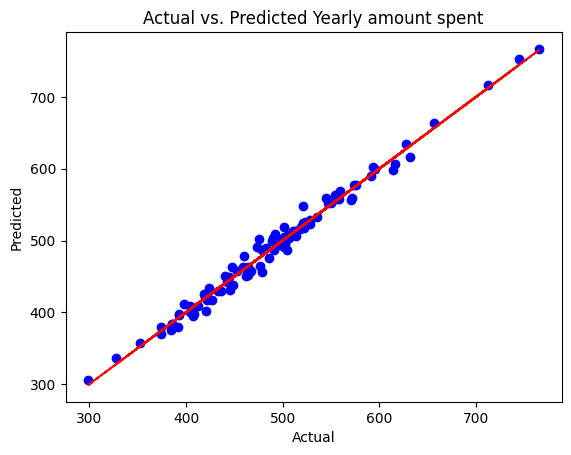

In [ ]:
plt.scatter(Y_test, y_pred, color="blue")
plt.plot(Y_test, Y_test, color="r", linestyle="--", label="Perfect Fit")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Yearly amount spent')
plt.show()

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[438.46488066 449.07031944]
 [489.6618454  482.60246733]
 [370.06954186 374.26967454]
 [513.8590556  513.15311185]
 [495.69799868 502.77107457]
 [450.88726525 461.7807422 ]
 [458.01303756 466.42119882]
 [336.6655623  327.37795259]
 [528.51544919 528.22380937]
 [663.27832042 657.01992394]
 [559.42244861 571.47103412]
 [526.02431274 523.63393514]
 [552.20571747 546.55666686]
 [457.67586182 467.4278485 ]
 [450.15607779 439.89128048]
 [431.65097987 445.06218551]
 [563.58511617 553.99467359]
 [408.35440214 403.7669021 ]
 [599.61853988 595.80381888]
 [486.84826737 490.73863214]
 [716.65493547 712.39632681]
 [496.79327186 502.0925279 ]
 [411.49845257 398.16346853]
 [556.55139426 570.45172591]
 [551.84576857 549.86059046]
 [398.18338551 392.99225591]
 [421.30757507 419.93877484]
 [395.15395642 407.65717876]
 [548.52797678 521.14295181]
 [463.48718386 463.74598112]
 [558.43909636 556.29814117]
 [505.52726976 506.54730705]
 [505.87531544 514.33655827]
 [463.94575658 476.76672415]
 [425.98372449

In [ ]:
coefficients = coefficients.values.flatten()
if coefficients[1] > coefficients[2]:
  print('Company have to invest more on mobile app experience')
else:
  print('Company have to invest moere on web app experience')

Company have to invest more on mobile app experience
